# Image Classification with TensorFlow

In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
from matplotlib import pyplot as plt

2024-04-14 21:18:51.688181: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2024-04-14 21:18:51.688228: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


### Load and re-scale input data

In [2]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [3]:
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

print (x_train.shape)
print (x_test.shape)

(60000, 28, 28)
(10000, 28, 28)


In [4]:
classes = {
    0: "T-shirt",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle boot", 
}

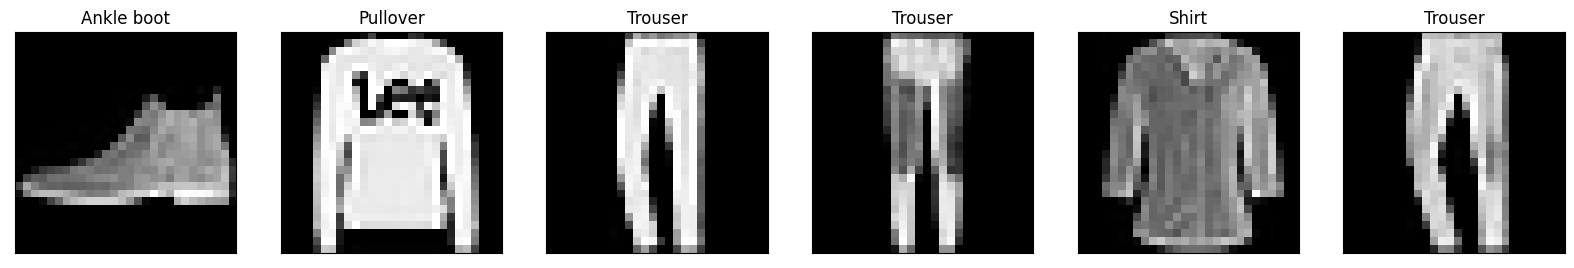

In [5]:
n = 6
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(1, n, i + 1)
    plt.imshow(x_test[i])
    plt.title(classes[y_test[i]])
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.show()

### Build model

In [6]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10)
])


2024-04-14 21:19:12.541272: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2024-04-14 21:19:12.541322: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2024-04-14 21:19:12.541343: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (ip-172-31-23-216): /proc/driver/nvidia/version does not exist
2024-04-14 21:19:12.541627: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


### Train the network

In [8]:
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
optimizer = tf.keras.optimizers.Adam()

In [9]:
model.compile(optimizer=optimizer,
              loss=loss_fn,
              metrics=['accuracy'])

In [10]:
model.fit(
    x_train, 
    y_train, 
    validation_data=(x_test, y_test), 
    epochs=20, 
    batch_size=128,
    shuffle=True
)

2024-04-14 21:19:18.418708: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 188160000 exceeds 10% of free system memory.


Epoch 1/20
469/469 [==============================] - 3s 6ms/step - loss: 0.5974 - accuracy: 0.7922 - val_loss: 0.4619 - val_accuracy: 0.8354
Epoch 2/20
469/469 [==============================] - 2s 5ms/step - loss: 0.4256 - accuracy: 0.8503 - val_loss: 0.4079 - val_accuracy: 0.8564
Epoch 3/20
469/469 [==============================] - 2s 5ms/step - loss: 0.3831 - accuracy: 0.8622 - val_loss: 0.3949 - val_accuracy: 0.8589
Epoch 4/20
469/469 [==============================] - 2s 5ms/step - loss: 0.3565 - accuracy: 0.8713 - val_loss: 0.3679 - val_accuracy: 0.8675
Epoch 5/20
469/469 [==============================] - 2s 5ms/step - loss: 0.3373 - accuracy: 0.8787 - val_loss: 0.3533 - val_accuracy: 0.8756
Epoch 6/20
469/469 [==============================] - 2s 4ms/step - loss: 0.3264 - accuracy: 0.8824 - val_loss: 0.3471 - val_accuracy: 0.8755
Epoch 7/20
469/469 [==============================] - 2s 5ms/step - loss: 0.3156 - accuracy: 0.8847 - val_loss: 0.3462 - val_accuracy: 0.8742
Epoch 

### More advanced model

For a slightly more complex and deeper network, try to train the model below